## Data Preparation

In this notebook, we will be tackling classification using the MNISt dataset.
First Let's import the data from Scikit learn library

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

e:\programming\AI\Machine-Learning-Projects\Project1\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Let's have a look at the target and data arrays to see what they contain:

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. so each image is 28x28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

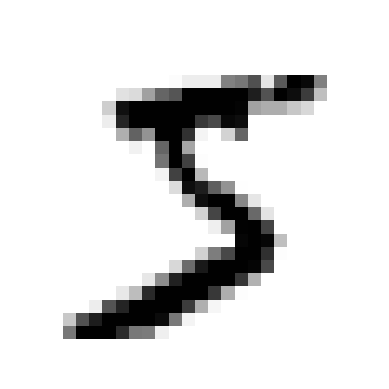

In [4]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

X= np.array(X)
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [5]:
y[0]

'5'

Since most values are expected to be integers so we can reduce size of y labels

In [6]:
y = y.astype(np.uint8)

The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):


In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 1- Reaching high Accuracy

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


Using Grid Search to find the best parameters

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'weights': ["uniform","distance"], 'n_neighbors': [1, 2, 3, 4 ,5]},
 ]
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [18]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [19]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

let's now evaluate it using cross_val_score() function;

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=3, scoring="accuracy")

array([0.9709 , 0.9698 , 0.97035])

In [21]:
from sklearn.metrics import accuracy_score
y_test_pred = grid_search.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_test_pred))


0.9714


In [ ]:
As we can see , we successfully predicted the accuracy of the model to be 97.1% which is quite good.

## 2- Data Augmentation function

let's try writing a function that takes an image vector and shift it by 1 pixel in all four directions

In [45]:
X_train.shape

(60000, 784)

In [41]:
from scipy.ndimage import shift 

m , n = X_train.shape

# Create new arrays to hold the shifted images and labels
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for i in range(m):
    image = X_train[i].reshape((28, 28))  # reshape to 2D
    for dx, dy in ((1, 0), (0, 1), (0, -1), (-1, 0)):
        shifted_image = shift(image, [dx, dy], cval=0).flatten()  # shift and flatten back to 1D
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(y_train[i])

In [42]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [43]:
X_train_augmented.shape

(300000, 784)

As we can see now , we have increased the size of the training set by 4 times.

In [46]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")